In [1]:
from sklearn.datasets import make_classification

In [2]:
X,Y=make_classification(n_samples=400,n_features=2,n_clusters_per_class=1,n_informative=2,n_redundant=0,random_state=3)

In [3]:
import matplotlib.pyplot as plt

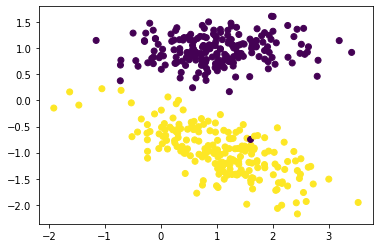

In [4]:
plt.scatter(X[:,0],X[:,1],c=Y)

In [5]:
Y[Y==0]=-1

In [6]:
import numpy as np

In [7]:
class SVM:
    def __init__(self,C=1.0):
        self.C=C
        self.b=0
        self.w=0
        
    def hingeLoss(self,w,b,X,Y):
        loss=0.0
        loss+=0.5*np.dot(w.T,w)
        m=X.shape[0]
        for i in range(m):
            ti=Y[i]*(np.dot(w,X[i].T)+b)
            loss+= self.C*max(0,(1-ti))
        return loss[0][0]    
    
    def fit(self,X,Y,b_s=100,r=0.01,itr=100):
        n=X.shape[0]
        m=X.shape[1]
        w=np.zeros((1,m))
        losses=[]
        b=0
        for i in range(itr):
            l=self.hingeLoss(w,b,X,Y)
            losses.append(l)
            ids=np.arange(n)
            np.random.shuffle(ids)
            
            for bs in range(0,n,b_s):
                gradw=0
                gradb=0
                for j in range(bs,bs+b_s):
                    if j<n:
                        i=ids[j]
                        ti=Y[i]*(np.dot(w,X[i].T)+b)
                        if ti>1:
                            gradw+=0
                            gradb+=0
                        else:
                            gradw+=self.C*X[i]*Y[i]
                            gradb+=self.C*Y[i]
                w=w-r*w+r*gradw
                b=b+r*gradb
        self.w=w
        self.b=b
        return w,b,losses

In [8]:
svm=SVM(C=10)
w,b,losses=svm.fit(X,Y)


In [9]:
w,b

(array([[-0.94852222, -3.65884699]]), 0.9000000000000018)

In [10]:
losses[0],losses[-1]

(4000.0, 66.65358953061403)

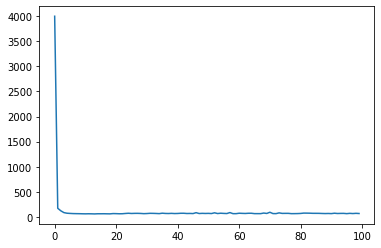

In [11]:
plt.plot(losses)

In [12]:
def plotHyperplane(w1,w2,b):
    plt.figure(figsize=(12,12))
    x_1=np.linspace(-2,4,10)
    x_2=-(w1*x_1+b)/w2 
    x_p=-(w1*x_1+b+1)/w2 
    x_n=-(w1*x_1+b-1)/w2 
    plt.plot(x_1,x_2,label="Hyperplane wX+b=0")
    plt.plot(x_1,x_p,label="+ve Hyperplane wX+b=1")
    plt.plot(x_1,x_n,label="-ve Hyperplane wX+b=-1")
    plt.legend()
    plt.scatter(X[:,0],X[:,1],c=Y)
    plt.show()

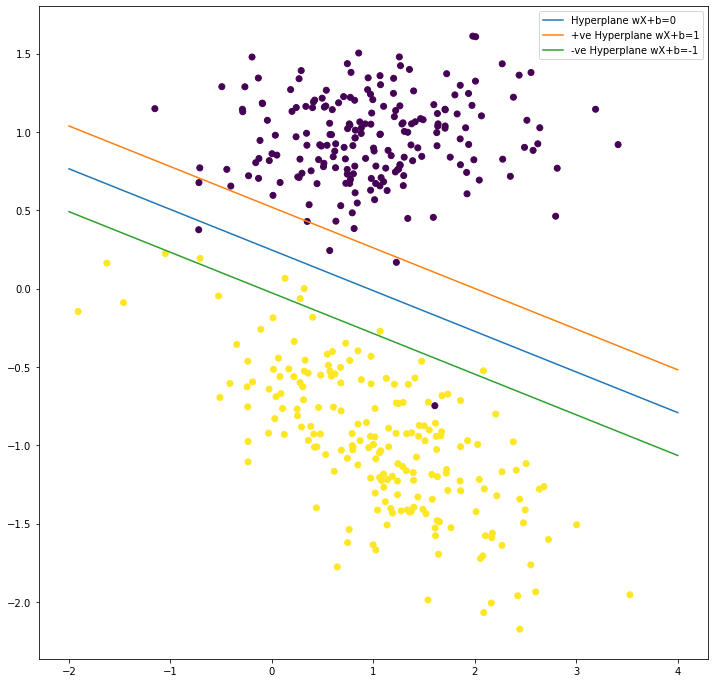

In [13]:
plotHyperplane(w[0,0],w[0,1],b)